In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%matplotlib inline

from os import listdir
from os.path import join, splitext
import random
from functools import partial

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from astropy.table import Table
import healpy as hp

from data import read_cmb_lensed_img
from plotting import plot_map

In [3]:
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 100

sns.set(style='ticks')
sns.set_palette('cubehelix')

In [ ]:
# Check MSE on M200b and M500c when predicting mean values


# Use new train test split


# Inspection of the provided CMB lensed images

In [4]:
img_dir = '/users/snakoneczny/data/lensing_takahashi_17/cmb_lens_imgs'
file_list = listdir(img_dir)
print('number of files: {}'.format(len(file_list)))

number of files: 45670


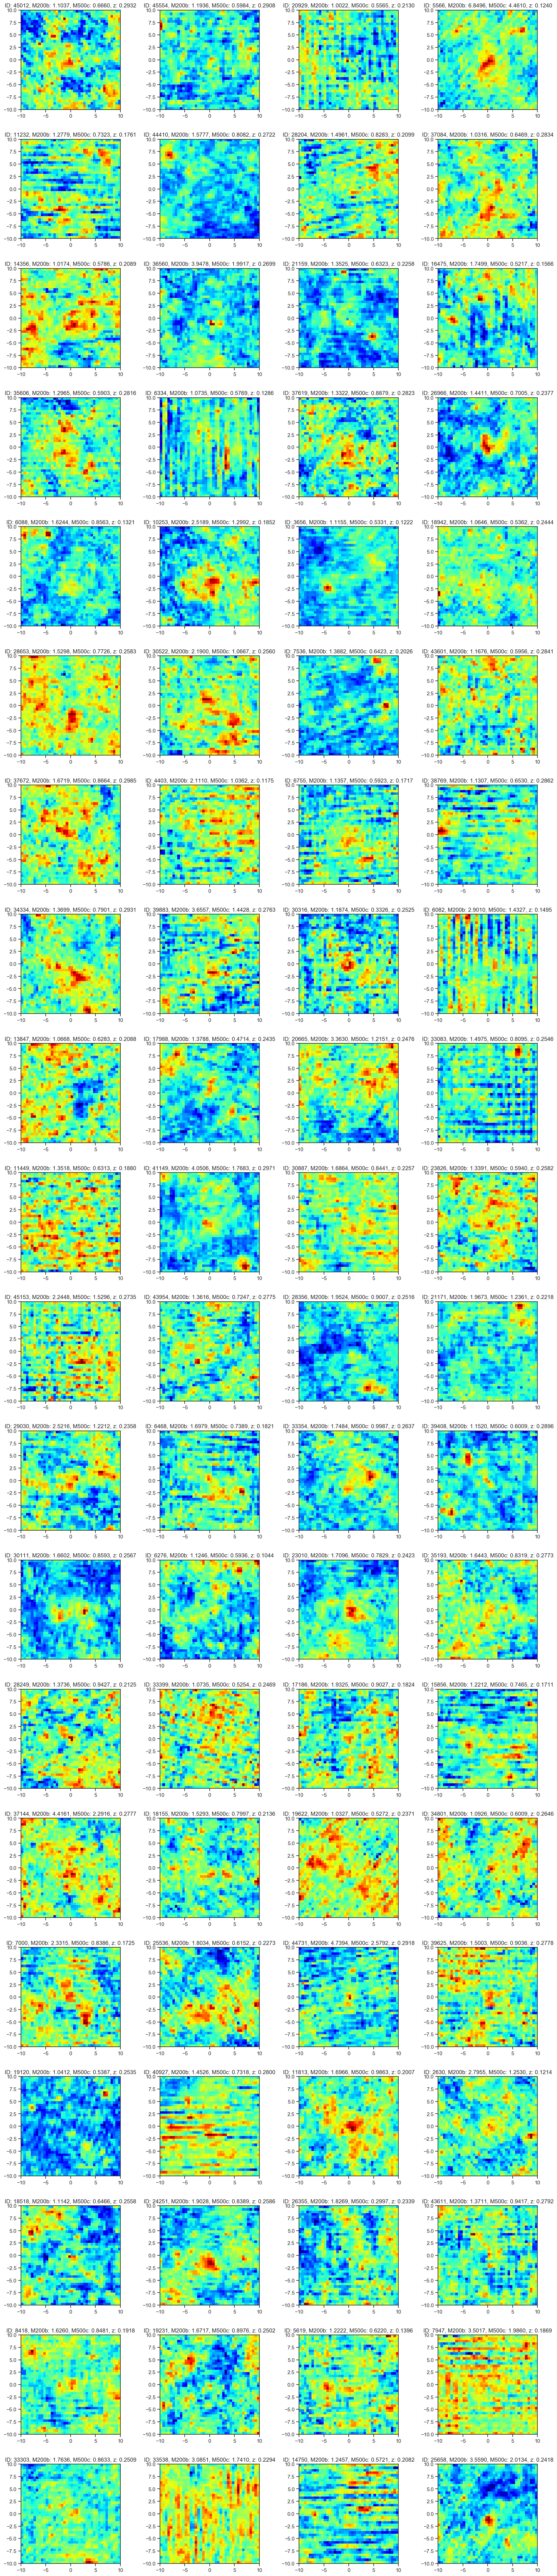

In [22]:
# Pick subset of the images to plot
random.seed(1456)
n_img = 80
file_list_subset = random.sample(file_list, n_img)

# Make plot adjusted for a grid of square images
width = 20
n_cols = 4
fig = plt.figure(figsize=(width, n_img / n_cols / n_cols * width))
fig.subplots_adjust(hspace=0.3, wspace=0.3)
mpl.rcParams['image.cmap'] = 'jet'

# Read and plot images in a grid
for i, file_name in enumerate(file_list_subset):
    file_path = join(img_dir, file_name)
    img, img_info = read_cmb_lensed_img(file_path)
    
    # Calculate image extent
    gsize = img_info['pix_size']
    nside = img_info['Ngrid']
    min = -0.5 * gsize * nside
    max = +0.5 * gsize * nside
    extent = (min, max, min, max)

    # Plot image in a proper grid cell
    ax = fig.add_subplot(n_img / n_cols, n_cols, i + 1)
    ax.imshow(img, extent=extent)
#     ax.set_xlabel('(arcmin)')
#     ax.set_ylabel('(arcmin)')

    # Add title with halo information
    img_id = splitext(file_name)[0].split('_')[-1]
    title = 'ID: {}, M200b: {:.4f}, M500c: {:.4f}, z: {:.4f}'.format(img_id, img_info['M200b'], img_info['M500c'],
                                                                 img_info['Redshift'])
    ax.set_title(title)

# Extraction of CMB lensed images

In [15]:
halo_file = '/users/snakoneczny/data/lensing_takahashi_17/skyhalo_nres12r000_1M.halo.fits'
halo_data = Table.read(halo_file, format='fits').to_pandas()

In [16]:
halo_data.describe()

ID     parent_ID          Mvir         M200b         M200c  \
count  9.969430e+05  9.969430e+05  9.969430e+05  9.969430e+05  9.969430e+05   
mean   1.282383e+07  2.810160e+04  6.477373e+12  6.683837e+12  5.784889e+12   
std    7.684926e+06  4.631910e+05  1.505171e+13  1.553685e+13  1.350744e+13   
min    1.800000e+01 -1.000000e+00  7.393000e+09  4.189500e+10  0.000000e+00   
25%    6.239412e+06 -1.000000e+00  3.984000e+11  4.312700e+11  3.417300e+11   
50%    1.264300e+07 -1.000000e+00  1.820000e+12  1.951800e+12  1.574800e+12   
75%    1.889426e+07 -1.000000e+00  6.677000e+12  6.982500e+12  5.888300e+12   
max    3.010283e+07  2.095340e+07  1.365000e+15  1.459900e+15  1.144300e+15   

              M500c        M2500c           Rvir             Rs  \
count  9.969430e+05  9.969430e+05  996943.000000  996943.000000   
mean   3.801632e+12  1.116592e+12     328.773306      69.363383   
std    9.059116e+12  3.163390e+12     211.554967      81.656084   
min    0.000000e+00  0.000000e+00      41.394001       0.069000   
25%    2.365800e+11  3.368000e+10     164.009000      18.646000   
50%    1.064600e+12  2.218000e+11     280.397000      43.323002   
75%    3.859300e+12  9.537300e+11     449.353000      90.058998   
max    8.076600e+14  4.277200e+14    2475.412100    1694.892000   

              z_halo         r_halo             Vr        theta_i  \
count  996943.000000  996943.000000  996943.000000  996943.000000   
mean        0.450047    1144.467425      -3.894022       1.569506   
std         0.334956     726.079307     330.698624       0.682810   
min         0.003084       7.878484   -3413.808300       0.001794   
25%         0.181738     523.798095    -211.784600       1.044941   
50%         0.359696     992.539000      -3.186679       1.569983   
75%         0.628846    1620.625200     204.922005       2.091766   
max         3.614642    4927.302200    2735.949700       3.139799   

               phi_i        theta_s          phi_s          ipix  \
count  996943.000000  996943.000000  996943.000000  9.969430e+05   
mean        3.145586       1.569541       3.145780  1.005591e+08   
std         1.812224       0.682792       1.812145  5.807553e+07   
min         0.000000       0.001773       0.000003  1.750000e+02   
25%         1.577260       1.045044       1.577551  5.014152e+07   
50%         3.146386       1.570093       3.146765  1.005871e+08   
75%         4.711622       2.091773       4.711628  1.507673e+08   
max         6.282994       3.139595       6.283184  2.013264e+08   

            kplane+1  
count  996943.000000  
mean        8.093709  
std         4.854443  
min         1.000000  
25%         4.000000  
50%         7.000000  
75%        11.000000  
max        33.000000

In [6]:
cmb_file = '/users/snakoneczny/data/lensing_takahashi_17/lensed_cmbmap_betazero_nres12r000.fits'
cmb_map = hp.read_map(cmb_file)

NSIDE = 4096
ORDERING = RING in fits file
INDXSCHM = IMPLICIT


<IPython.core.display.Javascript object>


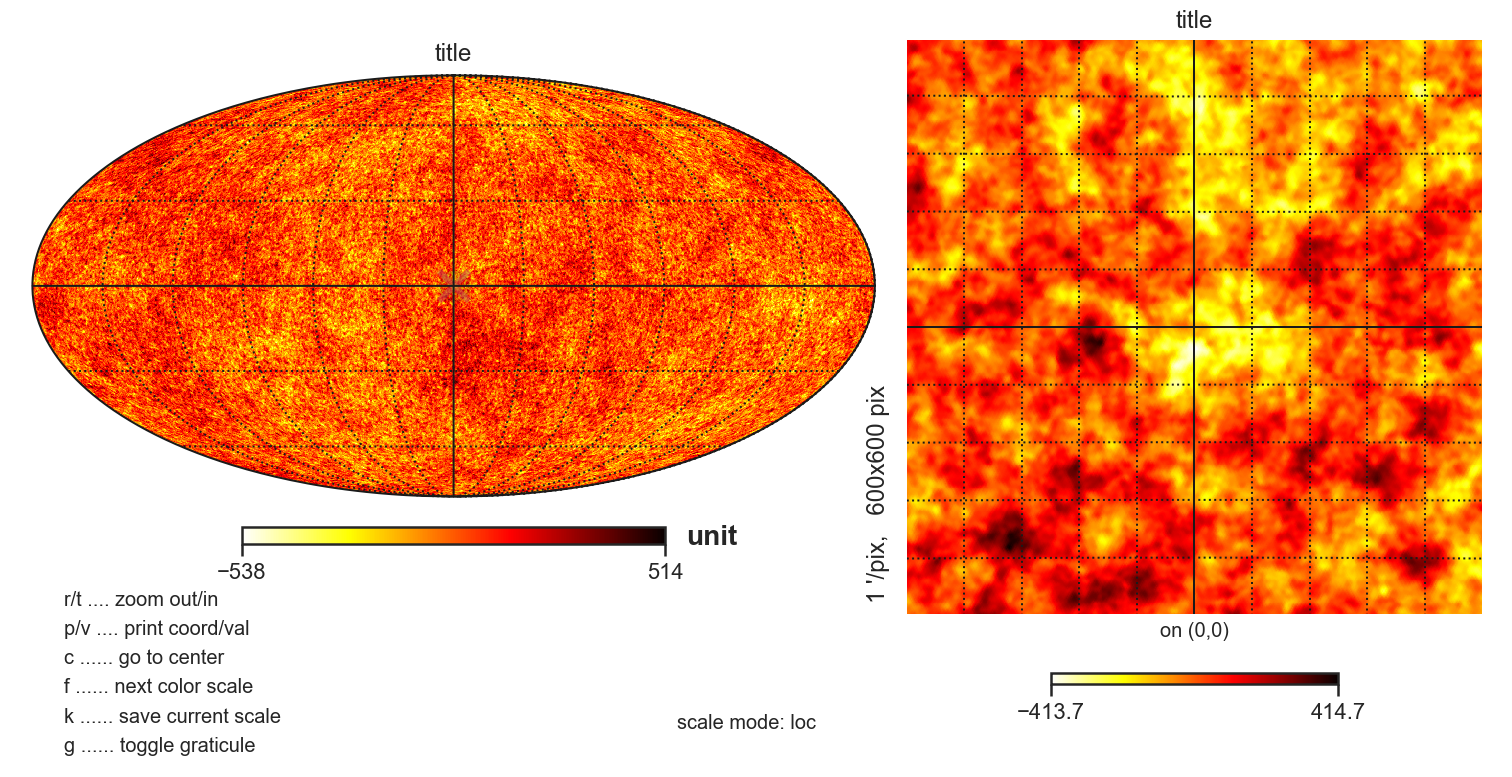

0.0 180.0 -180.0 180.0
The interval between parallels is 30 deg -0.00'.
The interval between meridians is 30 deg -0.00'.
82.976115752711 97.023884247289 -7.023884247289008 7.023884247289008
The interval between parallels is 1 deg 0.00'.
The interval between meridians is 1 deg 0.00'.


In [9]:
%matplotlib notebook
plot_map(cmb_map)

<IPython.core.display.Javascript object>


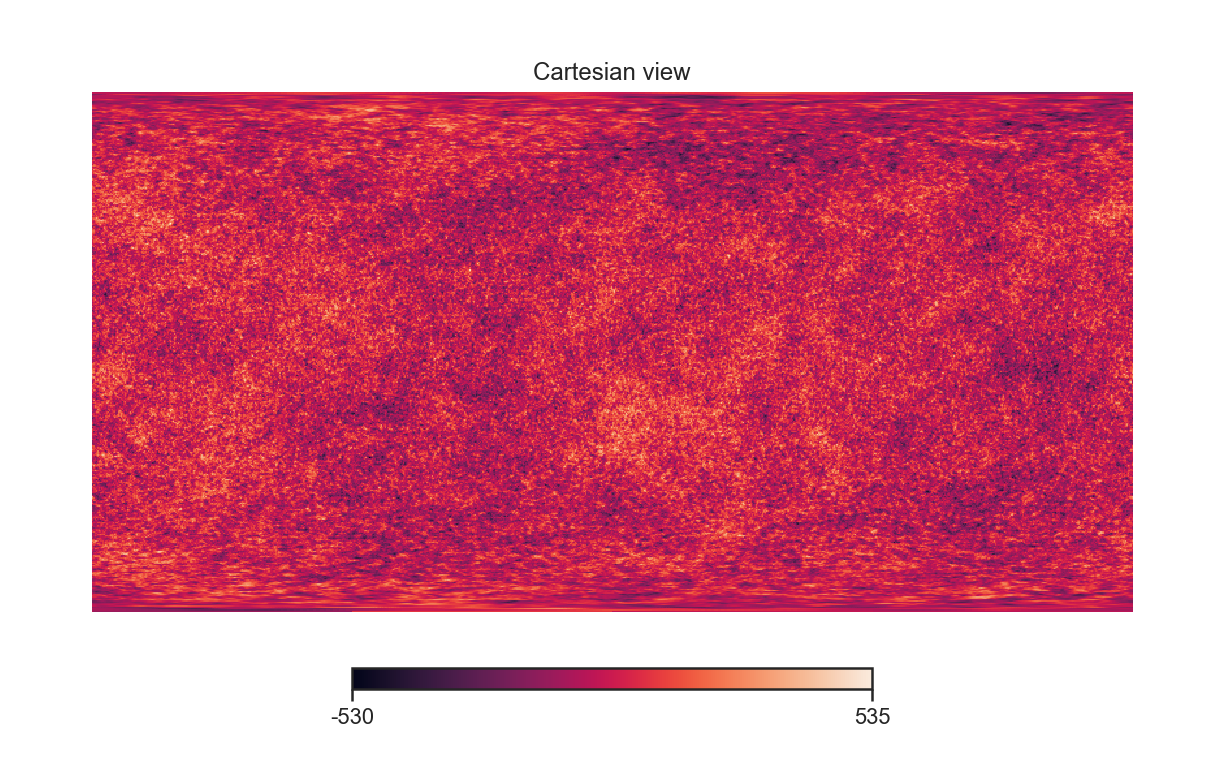

In [13]:
hp.visufunc.cartview(map=cmb_map)

In [11]:
projector = hp.projector.CartesianProj()
cmb_map_projected = projector.projmap(cmb_map, partial(hp.pixelfunc.vec2pix, 4096))

<IPython.core.display.Javascript object>


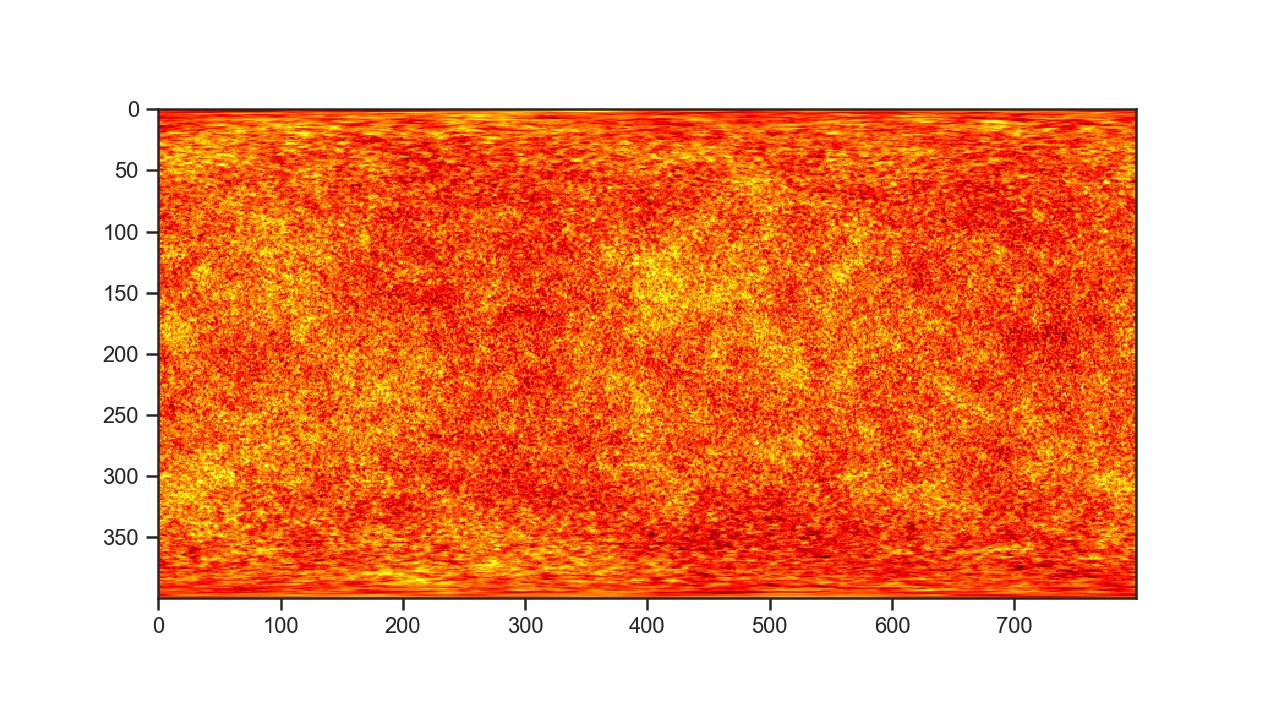

In [14]:
plt.figure()
plt.imshow(cmb_map_projected, cmap='hot', interpolation='nearest')
plt.show()

In [28]:
x_max, y_max = cmb_map_projected.shape
for index, row in halo_data.iterrows():
    theta, phi = row['theta_i'], row['phi_i']
#     loc_vec = hp.pixelfunc.ang2vec(theta, phi)
    x, y = projector.ang2xy(theta, phi)
    
    if x < 0: x += x_max
    if y < 0: y += y_max

    # disc = hp.query_disc(nside=4096, vec=loc_vec, radius=1)  # TODO:

    # Define size of square to cut
    resolution = 128
    
    # Continue if not enough place to cut a full square
    if x < resolution or x > x_max - resolution or y < resolution or y > y_max - resolution:
        continue
        
    # Check if not too far from equator
    if 100 < x < 300:
        cmb_segment = cmb_map_projected[x - resolution/2: x + resolution/2, y - resolution/2: y + resolution/2]
        
        plt.imshow(cmb_segment, cmap='hot', interpolation='nearest')
        
        break